# Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

#Mount Google Drive and define path to data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# change the path to your drive or comment out first line  with cd command if running locally
%cd '/content/drive/MyDrive/ZEIS/Task2/Code/'
path_to_data = './data/raw/Bias_correction_ucl.csv'

/content/drive/MyDrive/ZEIS/Task2/Code


#Read and visualize raw data

In [4]:
# Load the csv file
df = pd.read_csv(path_to_data)

# Show data size
print(df.shape)

# Show data types
print(df.dtypes)

# Show first 5 rows
df.head()

(7752, 25)
station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Convert Date column to two columns of Month and Day of type float

In [5]:
# extract two columns Day,Month from the Date column
df["Day"] = pd.to_datetime(df["Date"]).dt.day
df["Month"] = pd.to_datetime(df["Date"]).dt.month

# drop the date column
df.drop('Date', axis = 1, inplace = True)

# describe the new data set 
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000,7750.000000,7750.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,15.983871,7.467742
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613,8.918647,0.530334
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,1.000000,6.000000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000,8.000000,7.000000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,16.000000,7.000000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,24.000000,8.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,31.000000,8.000000


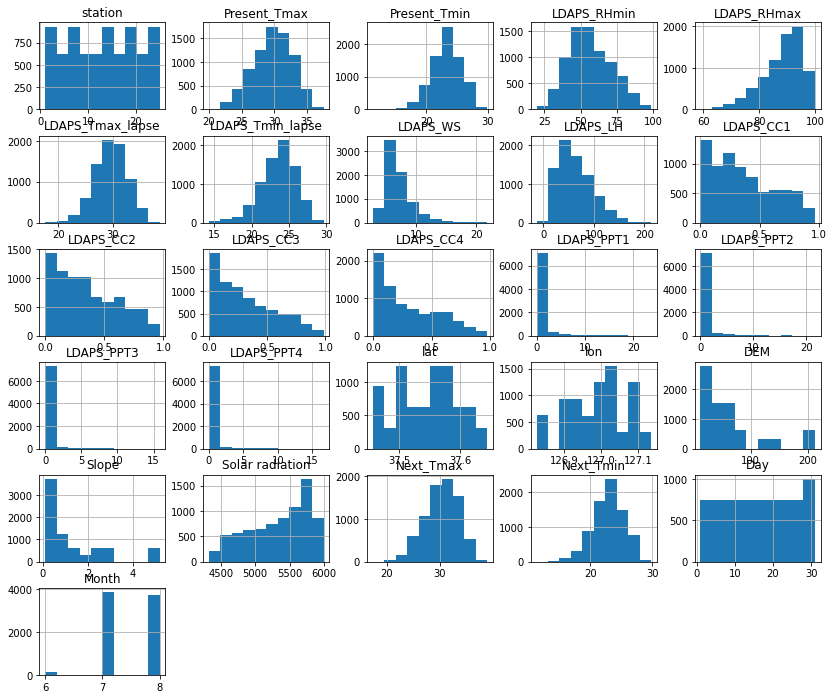

In [6]:
# Show feature distributions
df.hist(figsize = (14,12));

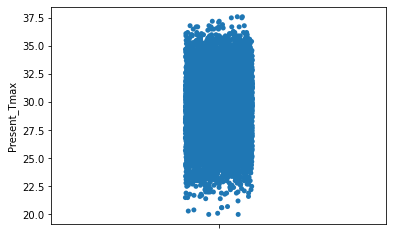

In [7]:
# Plot values of present maximum (Present_Tmax) for exploration
df.Present_Tmax.describe()
sns.stripplot(y='Present_Tmax',data=df)

# Process data: Handle missing values

Explore missing values.

In [8]:
# show missing value counts in each column
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
dtype: int64

There are missing values in data. 
Features Lat, DEM, slope, lon, and Solar radiation have zero null values.

In [9]:
# Drop rows with missing values in target features Next_Tmax and Next_Tmin
df.dropna(subset=['Next_Tmax', 'Next_Tmin'], inplace = True)

In [10]:
# Fill the missing values in the day and month column with the most frequent values
df['Month'].fillna(df['Month'].mode()[0], inplace=True)
df['Day'].fillna(df['Day'].mode()[0], inplace=True)

Use sklearn.impute.SimpleImputer to handle the rest of the missing values.


In [11]:
# initialize an instance of sklearn.impute.SimpleImputer
imputer = SimpleImputer()

# train the Simple Imputer and transform the missing values with it
df_new = pd.DataFrame(imputer.fit_transform(df))

# put the previous column names to the new df after transformation
df_new.columns = df.columns

# check missing value counts in each column
df_new.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
dtype: int64

There are no missing values in transformed data. Let's check the first rows and the shape.

In [12]:
# explore transformed data 
print(df_new.shape)
df_new.head()

(7725, 26)


,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0


In [13]:
# Save data set without missing values
df_new.to_csv('./data/no_missing_values/Bias_correction_ucl_without_na.csv', index=False)

# Visualize preprocessed data

Plot data distributions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

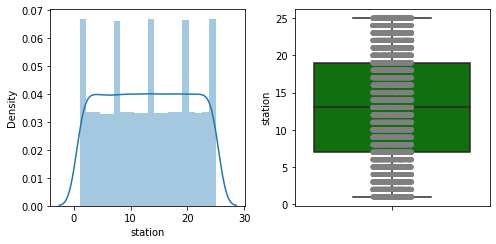

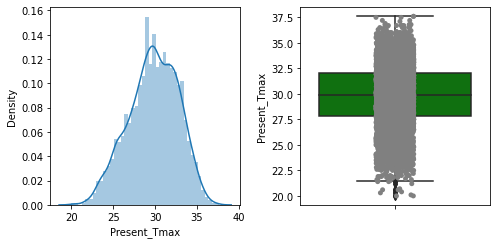

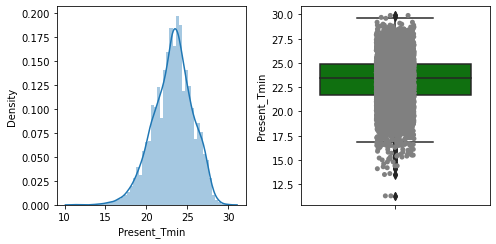

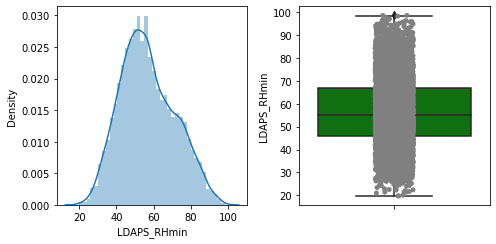

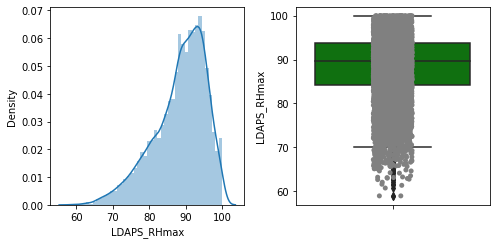

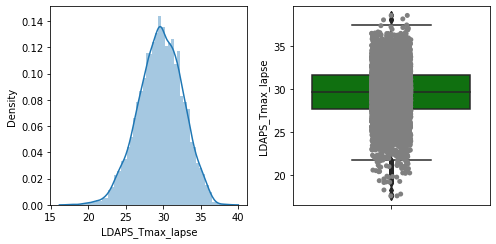

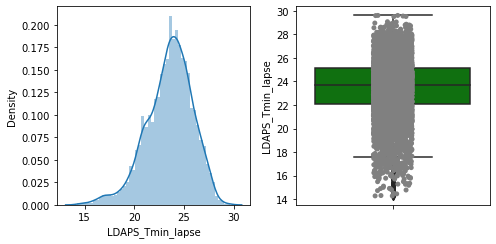

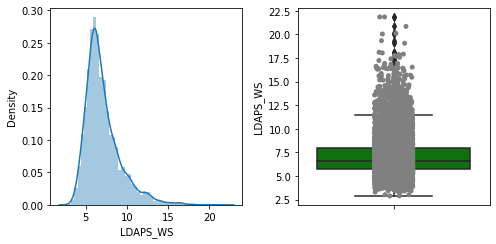

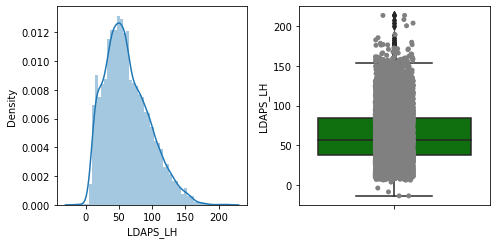

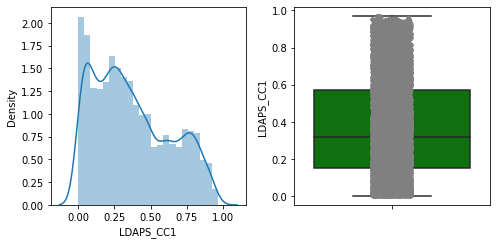

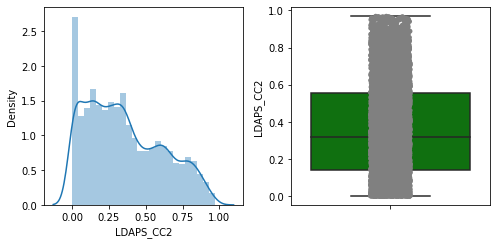

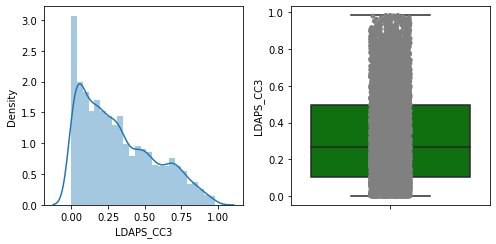

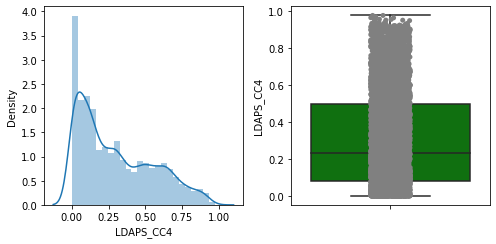

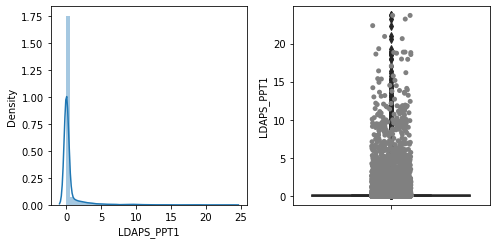

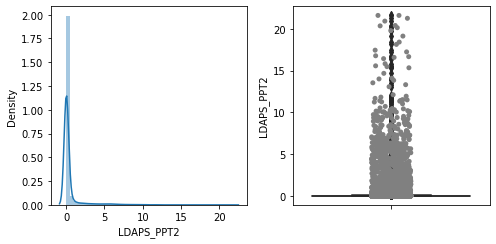

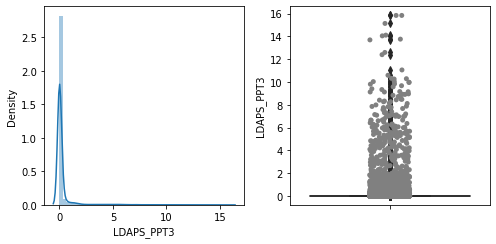

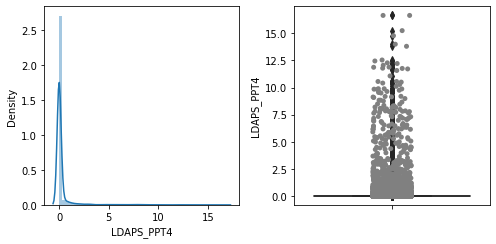

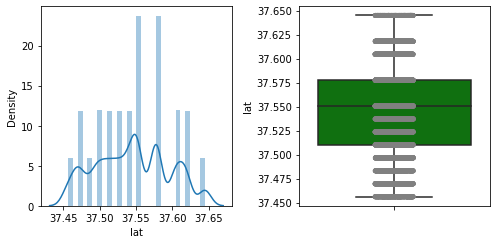

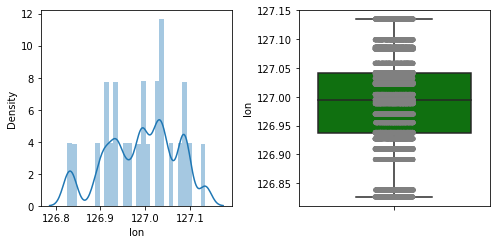

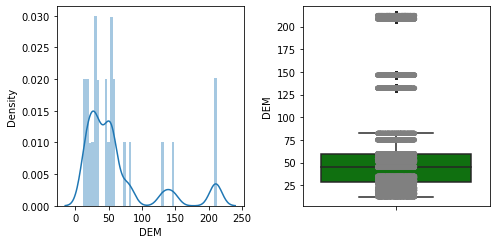

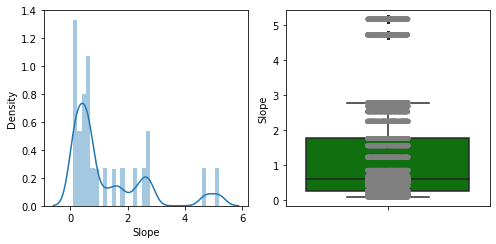

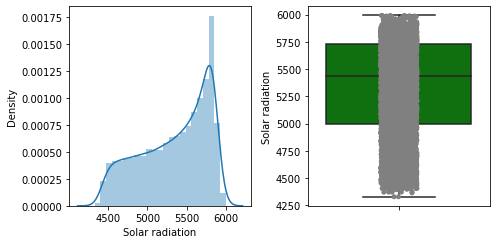

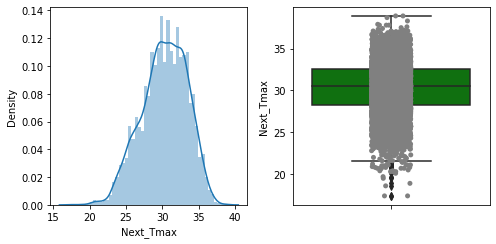

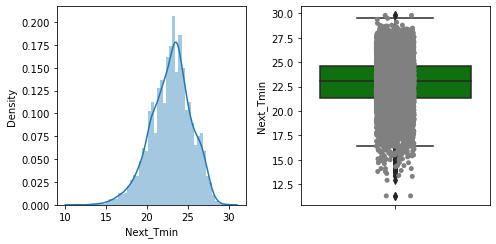

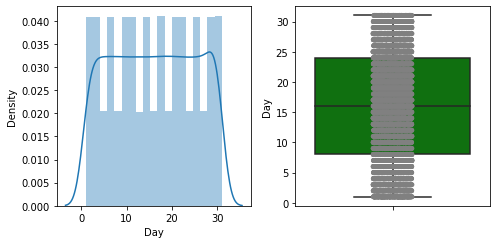

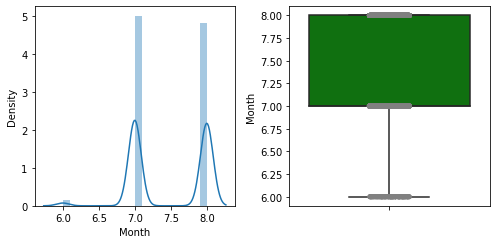

In [14]:
for i in df_new.columns:
  plt.rcParams["figure.figsize"] = [7.00, 3.50]
  plt.rcParams["figure.autolayout"] = True
  f, axes = plt.subplots(1, 2)
  sns.distplot(df_new[i],ax=axes[0])
  sns.boxplot(y = i, data = df_new , color='Green',ax=axes[1])
  sns.stripplot(y = i, data = df_new,color='Gray',ax=axes[1])

Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, Next_Tmax, Next_Tmin all have bell shaped curve graphs, wheres other graphs are slightly skewed.

In [15]:
for i in df_new.columns:                                         
    plt.figure(figsize = (15, 8))
    sns.regplot(df_new[i], df_new['Next_Tmax'])
    plt.title('Scatter Plot for Next Tmax vs other attributes')
    plt.xlabel(i)
    plt.ylabel('Next Max Temperature')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [16]:
for i in df_new.columns:                                          
    plt.figure(figsize = (15, 8))
    sns.regplot(df_new[i], df_new['Next_Tmin'])
    plt.title('Scatter Plot for Next Tmin vs other attributes')
    plt.xlabel(i)
    plt.ylabel('Next Minimum Temperature')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

Most of the graphs show that other features are linearly correlated with the target variables Next_Tmax and Next_Tmin.

# Feature Selection

Plot correlation matrix.


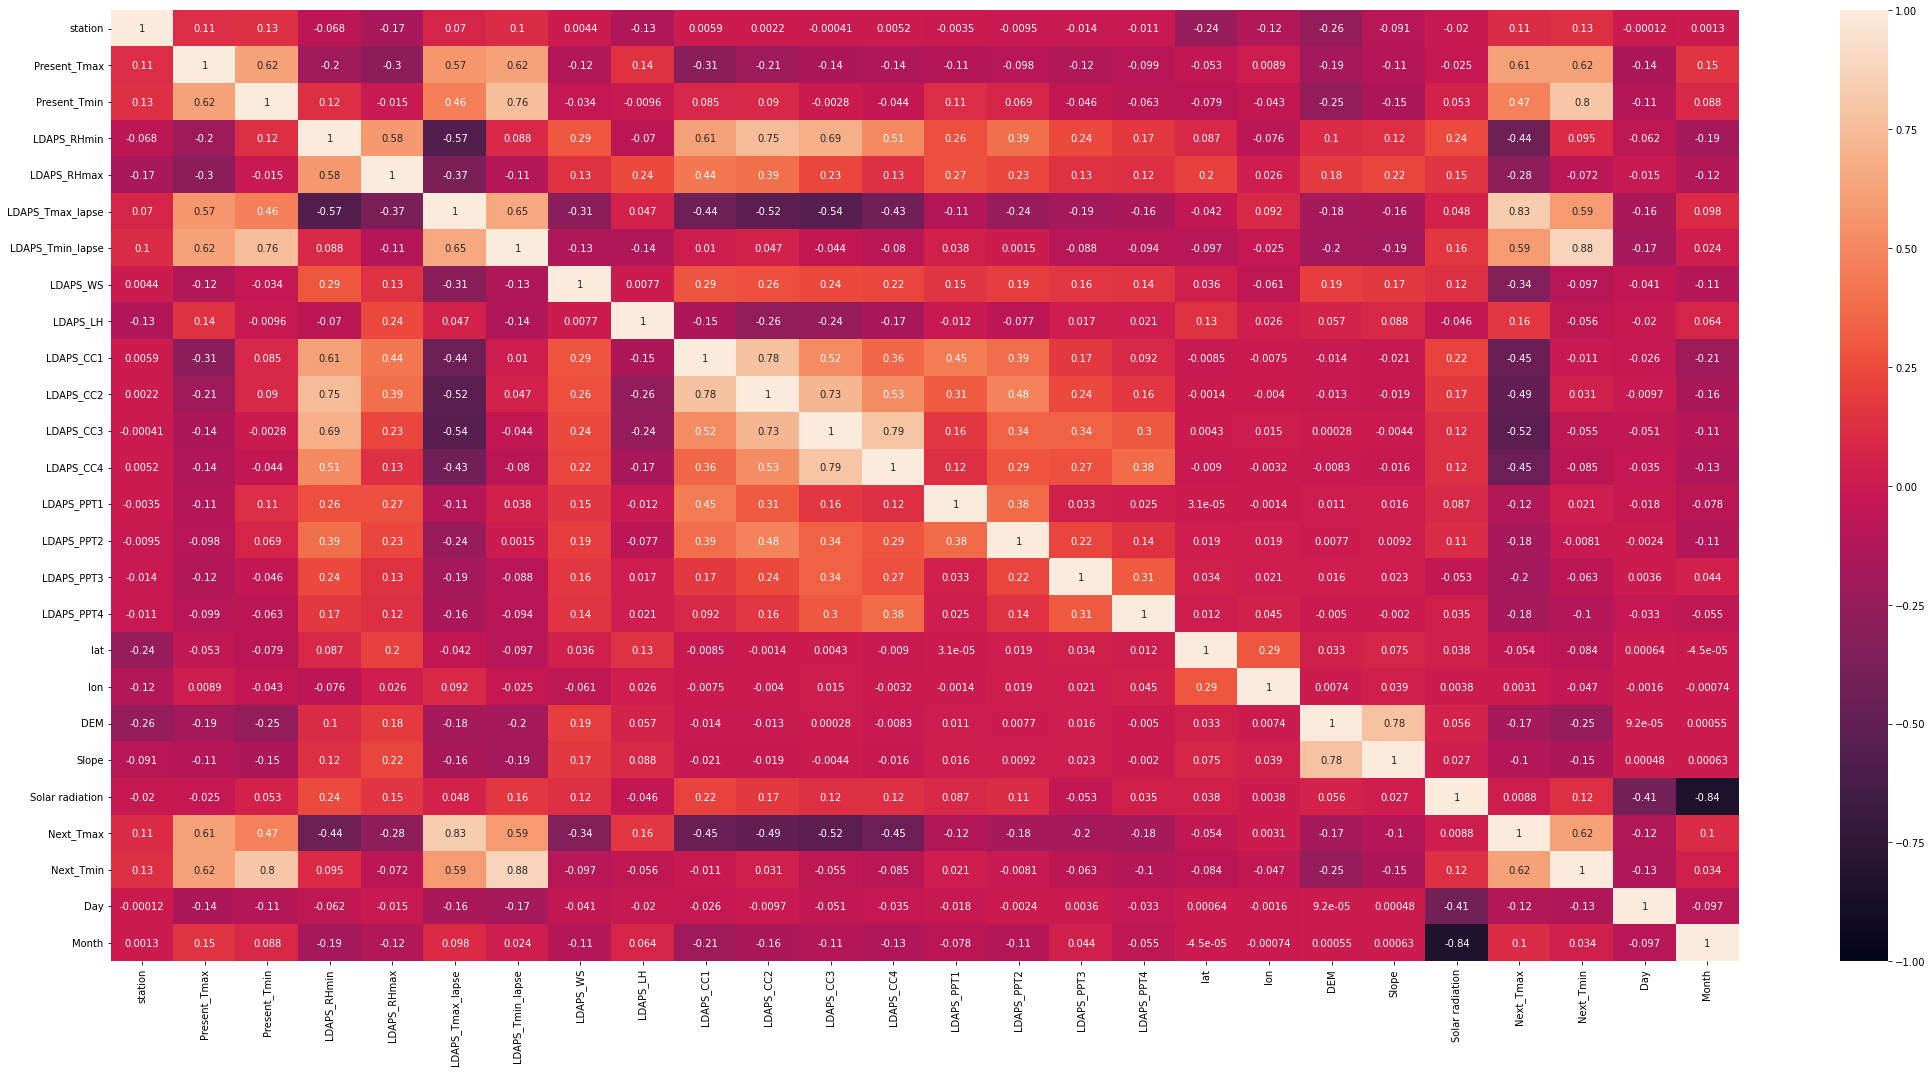

In [17]:
fig, ax = plt.subplots(figsize=(30,15))         # Sample figsize in inches
# generate correlation matrix
correlation_mat = df_new.corr()

# plot heatmap of the corr. matrix
sns.heatmap(correlation_mat, annot = True, ax=ax, vmin=-1, vmax=1)

Show the most correlated features for Next_Tmax.

In [18]:
cor=df_new.corr()
cor_target = abs(cor['Next_Tmax'])
relevant_features = cor_target[cor_target>0.4]
relevant_features

Present_Tmax        0.610866
Present_Tmin        0.472134
LDAPS_RHmin         0.439079
LDAPS_Tmax_lapse    0.828822
LDAPS_Tmin_lapse    0.588000
LDAPS_CC1           0.453576
LDAPS_CC2           0.491905
LDAPS_CC3           0.516146
LDAPS_CC4           0.447372
Next_Tmax           1.000000
Next_Tmin           0.621427
Name: Next_Tmax, dtype: float64

Show the most correlated features for Next_Tmin.

In [19]:
cor=df_new.corr()
cor_target = abs(cor['Next_Tmin'])
relevant_features = cor_target[cor_target>0.4]
relevant_features

Present_Tmax        0.623271
Present_Tmin        0.797224
LDAPS_Tmax_lapse    0.588027
LDAPS_Tmin_lapse    0.881705
Next_Tmax           0.621427
Next_Tmin           1.000000
Name: Next_Tmin, dtype: float64

# Conclusion

### Useful (independent) variables for predicting the target :

* To predict two target variables *Next_Tmax* and *Next_Tmin*, useful variables are Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax,LDAPS_Tmax_lapse, LDAPS_Tmin_lapse

###Observations:
*   Both target variables are highly correlated with each other.
*   There are other variables that correlate with the target values highly:
*Next_Tmax* and *Next_Tmin* have high correlation with LDAPS_Tmax_lapse and LDAPS_Tmin_lapse as well as with Present_Tmax and Present_Tmin.
*  Present_Tmax and Present_Tmin are also correlated with LDAPS_Tmax_lapse and LDAPS_Tmin_lapse.
* The humidy has high correlation with clouds (see LDAPS_RHmin, LDAPSCC1, 2, 3, and 4).
* We can also notice some correlation between the LDAPS_PPT variables. It probably means that the next day is likely to rain if it rained the rain before.
* The LDAPSCC variables are also correlated between themselves. It probably mens that the the next day is likely to be cloudy if it was cloudy the day before.
* We can observe a negative correlation between LDAPSCC variables and LDAPS_Tmax_lapse. It makes sense because the cloundy day tends to have a lower temperature.

### Missing value counts in independent variables:

1.   Present_Tmax        70
2.   Present_Tmin        70
3.   LDAPS_RHmin         75
4.   LDAPS_RHmax         75
5.   LDAPS_Tmax_lapse    75
6.   LDAPS_Tmin_lapse    75